# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

wine quality rated 0 to 10 where 10 is very good and 0 is very bad

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [91]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [92]:
df.shape

(1599, 12)

In [93]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [94]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [95]:
df.sample(4)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1101            7.4              0.49         0.27             2.1      0.071   
1171            7.1              0.59         0.00             2.2      0.078   
586            11.1              0.31         0.49             2.7      0.094   
738             9.0              0.46         0.23             2.8      0.092   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1101                 14.0                  25.0  0.99388  3.35       0.63   
1171                 26.0                  44.0  0.99522  3.42       0.68   
586                  16.0                  47.0  0.99860  3.12       1.02   
738                  28.0                 104.0  0.99830  3.10       0.56   

      alcohol  quality  
1101     12.0        6  
1171     10.8        6  
586      10.6        7  
738       9.2        5

In [96]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values present in any column

<function matplotlib.pyplot.show(close=None, block=None)>

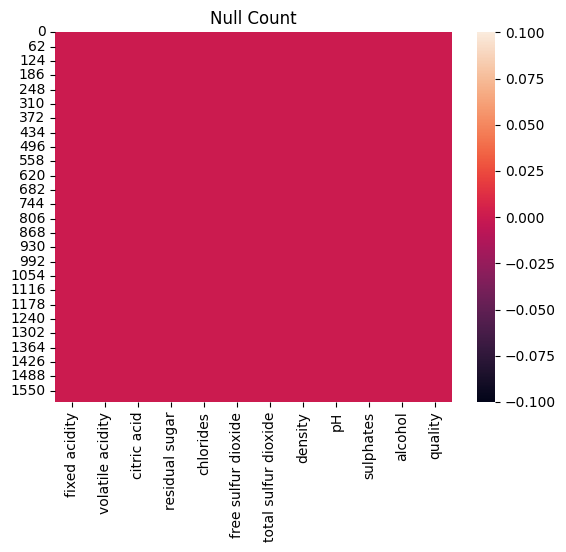

In [97]:
sns.heatmap(df.isnull())
plt.title("Null Count")
plt.show

In [98]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All data values are in float or in int  as required

In [99]:
for col in df:
    print(df[col].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


It shows us unique values and there counts 

<Axes: xlabel='quality', ylabel='count'>

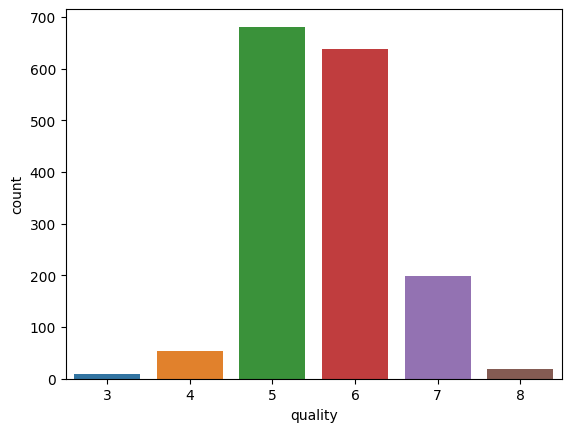

In [100]:
sns.countplot(x='quality',data=df)

# EDA

<Axes: xlabel='fixed acidity', ylabel='quality'>

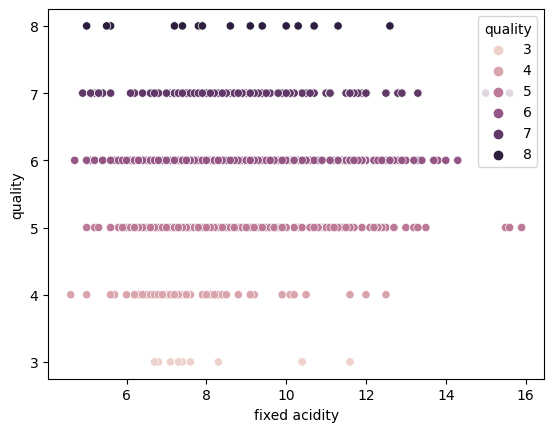

In [101]:
sns.scatterplot
sns.scatterplot(x="fixed acidity",y="quality",data=df,hue='quality')

In [102]:
# We can see that if fixed acidity increase then quality also increase. there is positive raltion 

<Axes: xlabel='volatile acidity', ylabel='quality'>

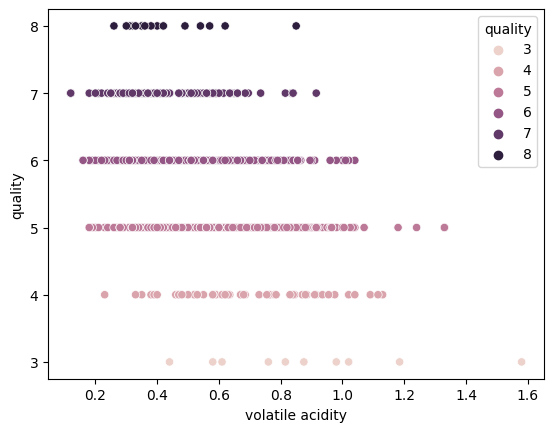

In [103]:
sns.scatterplot
sns.scatterplot(x="volatile acidity",y="quality",data=df,hue='quality')

In [104]:
# Here we can see volatile acidity has negative relation hence quality is getting low if volatile is increased.

<Axes: xlabel='citric acid', ylabel='quality'>

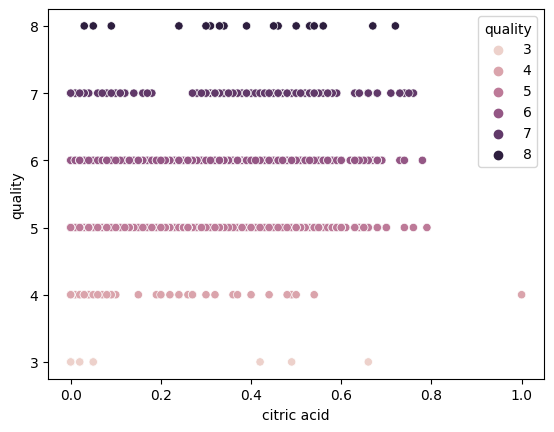

In [105]:
sns.scatterplot
sns.scatterplot(x="citric acid",y="quality",data=df,hue='quality')

In [106]:
# here we have positive correaltiom

<Axes: xlabel='residual sugar', ylabel='quality'>

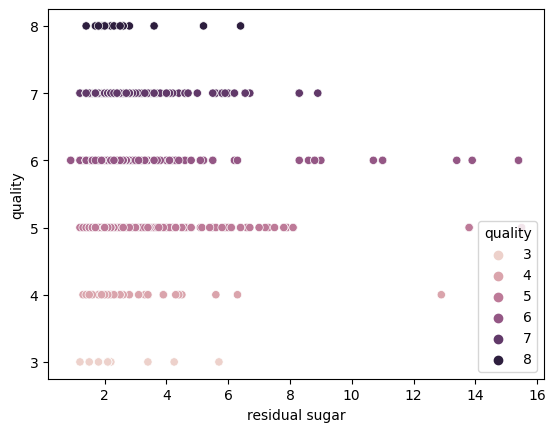

In [107]:
sns.scatterplot
sns.scatterplot(x="residual sugar",y="quality",data=df,hue='quality')

In [108]:
# We can se negative relation

<Axes: xlabel='chlorides', ylabel='quality'>

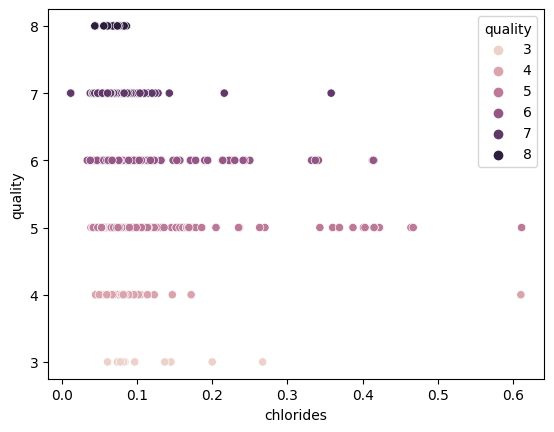

In [109]:
sns.scatterplot
sns.scatterplot(x="chlorides",y="quality",data=df,hue='quality')

<Axes: xlabel='free sulfur dioxide', ylabel='quality'>

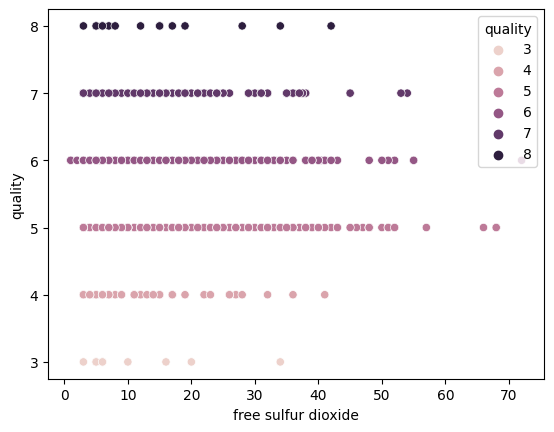

In [110]:
sns.scatterplot
sns.scatterplot(x="free sulfur dioxide",y="quality",data=df,hue='quality')

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

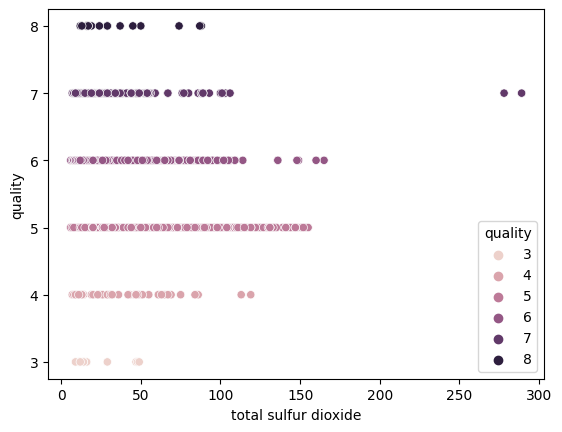

In [111]:
sns.scatterplot
sns.scatterplot(x="total sulfur dioxide",y="quality",data=df,hue='quality')

<Axes: xlabel='density', ylabel='quality'>

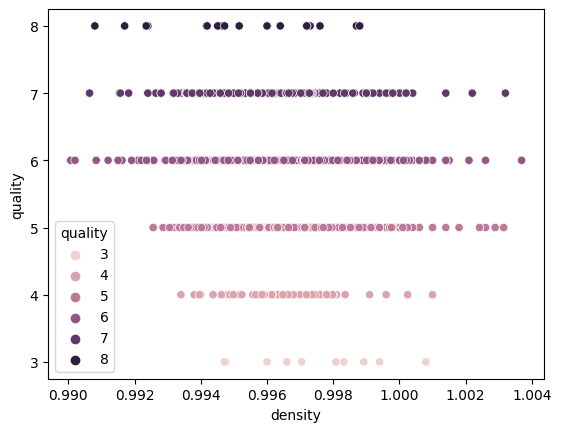

In [112]:
sns.scatterplot
sns.scatterplot(x="density",y="quality",data=df,hue='quality')

In [113]:
# this is one more example of postive relation as we can see quality is increased one density is increased

<Axes: xlabel='pH', ylabel='quality'>

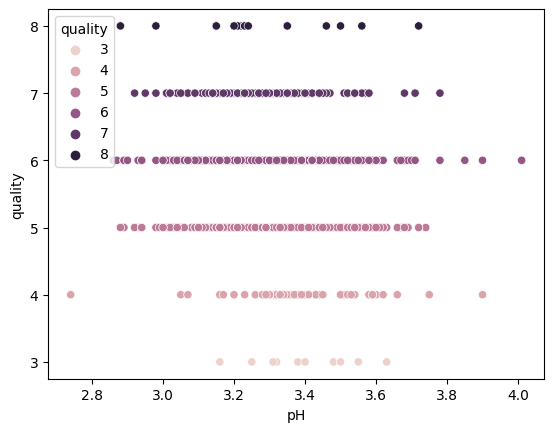

In [114]:
sns.scatterplot
sns.scatterplot(x="pH",y="quality",data=df,hue='quality')

<Axes: xlabel='sulphates', ylabel='quality'>

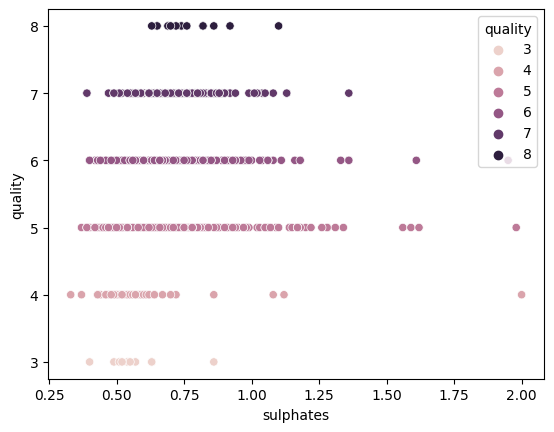

In [115]:
sns.scatterplot
sns.scatterplot(x="sulphates",y="quality",data=df,hue='quality')

<Axes: xlabel='alcohol', ylabel='quality'>

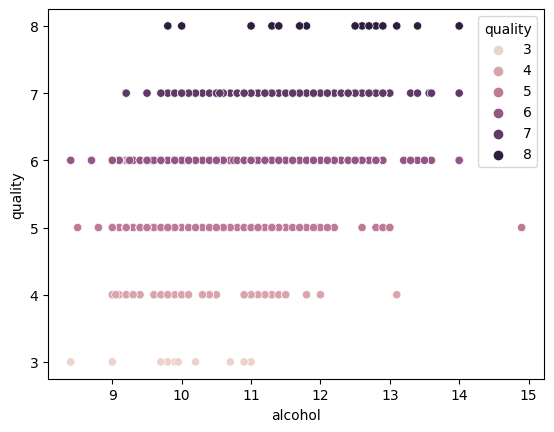

In [116]:
sns.scatterplot
sns.scatterplot(x="alcohol",y="quality",data=df,hue='quality')

In [117]:
# Again we are increasing alcohol then quality is also increased

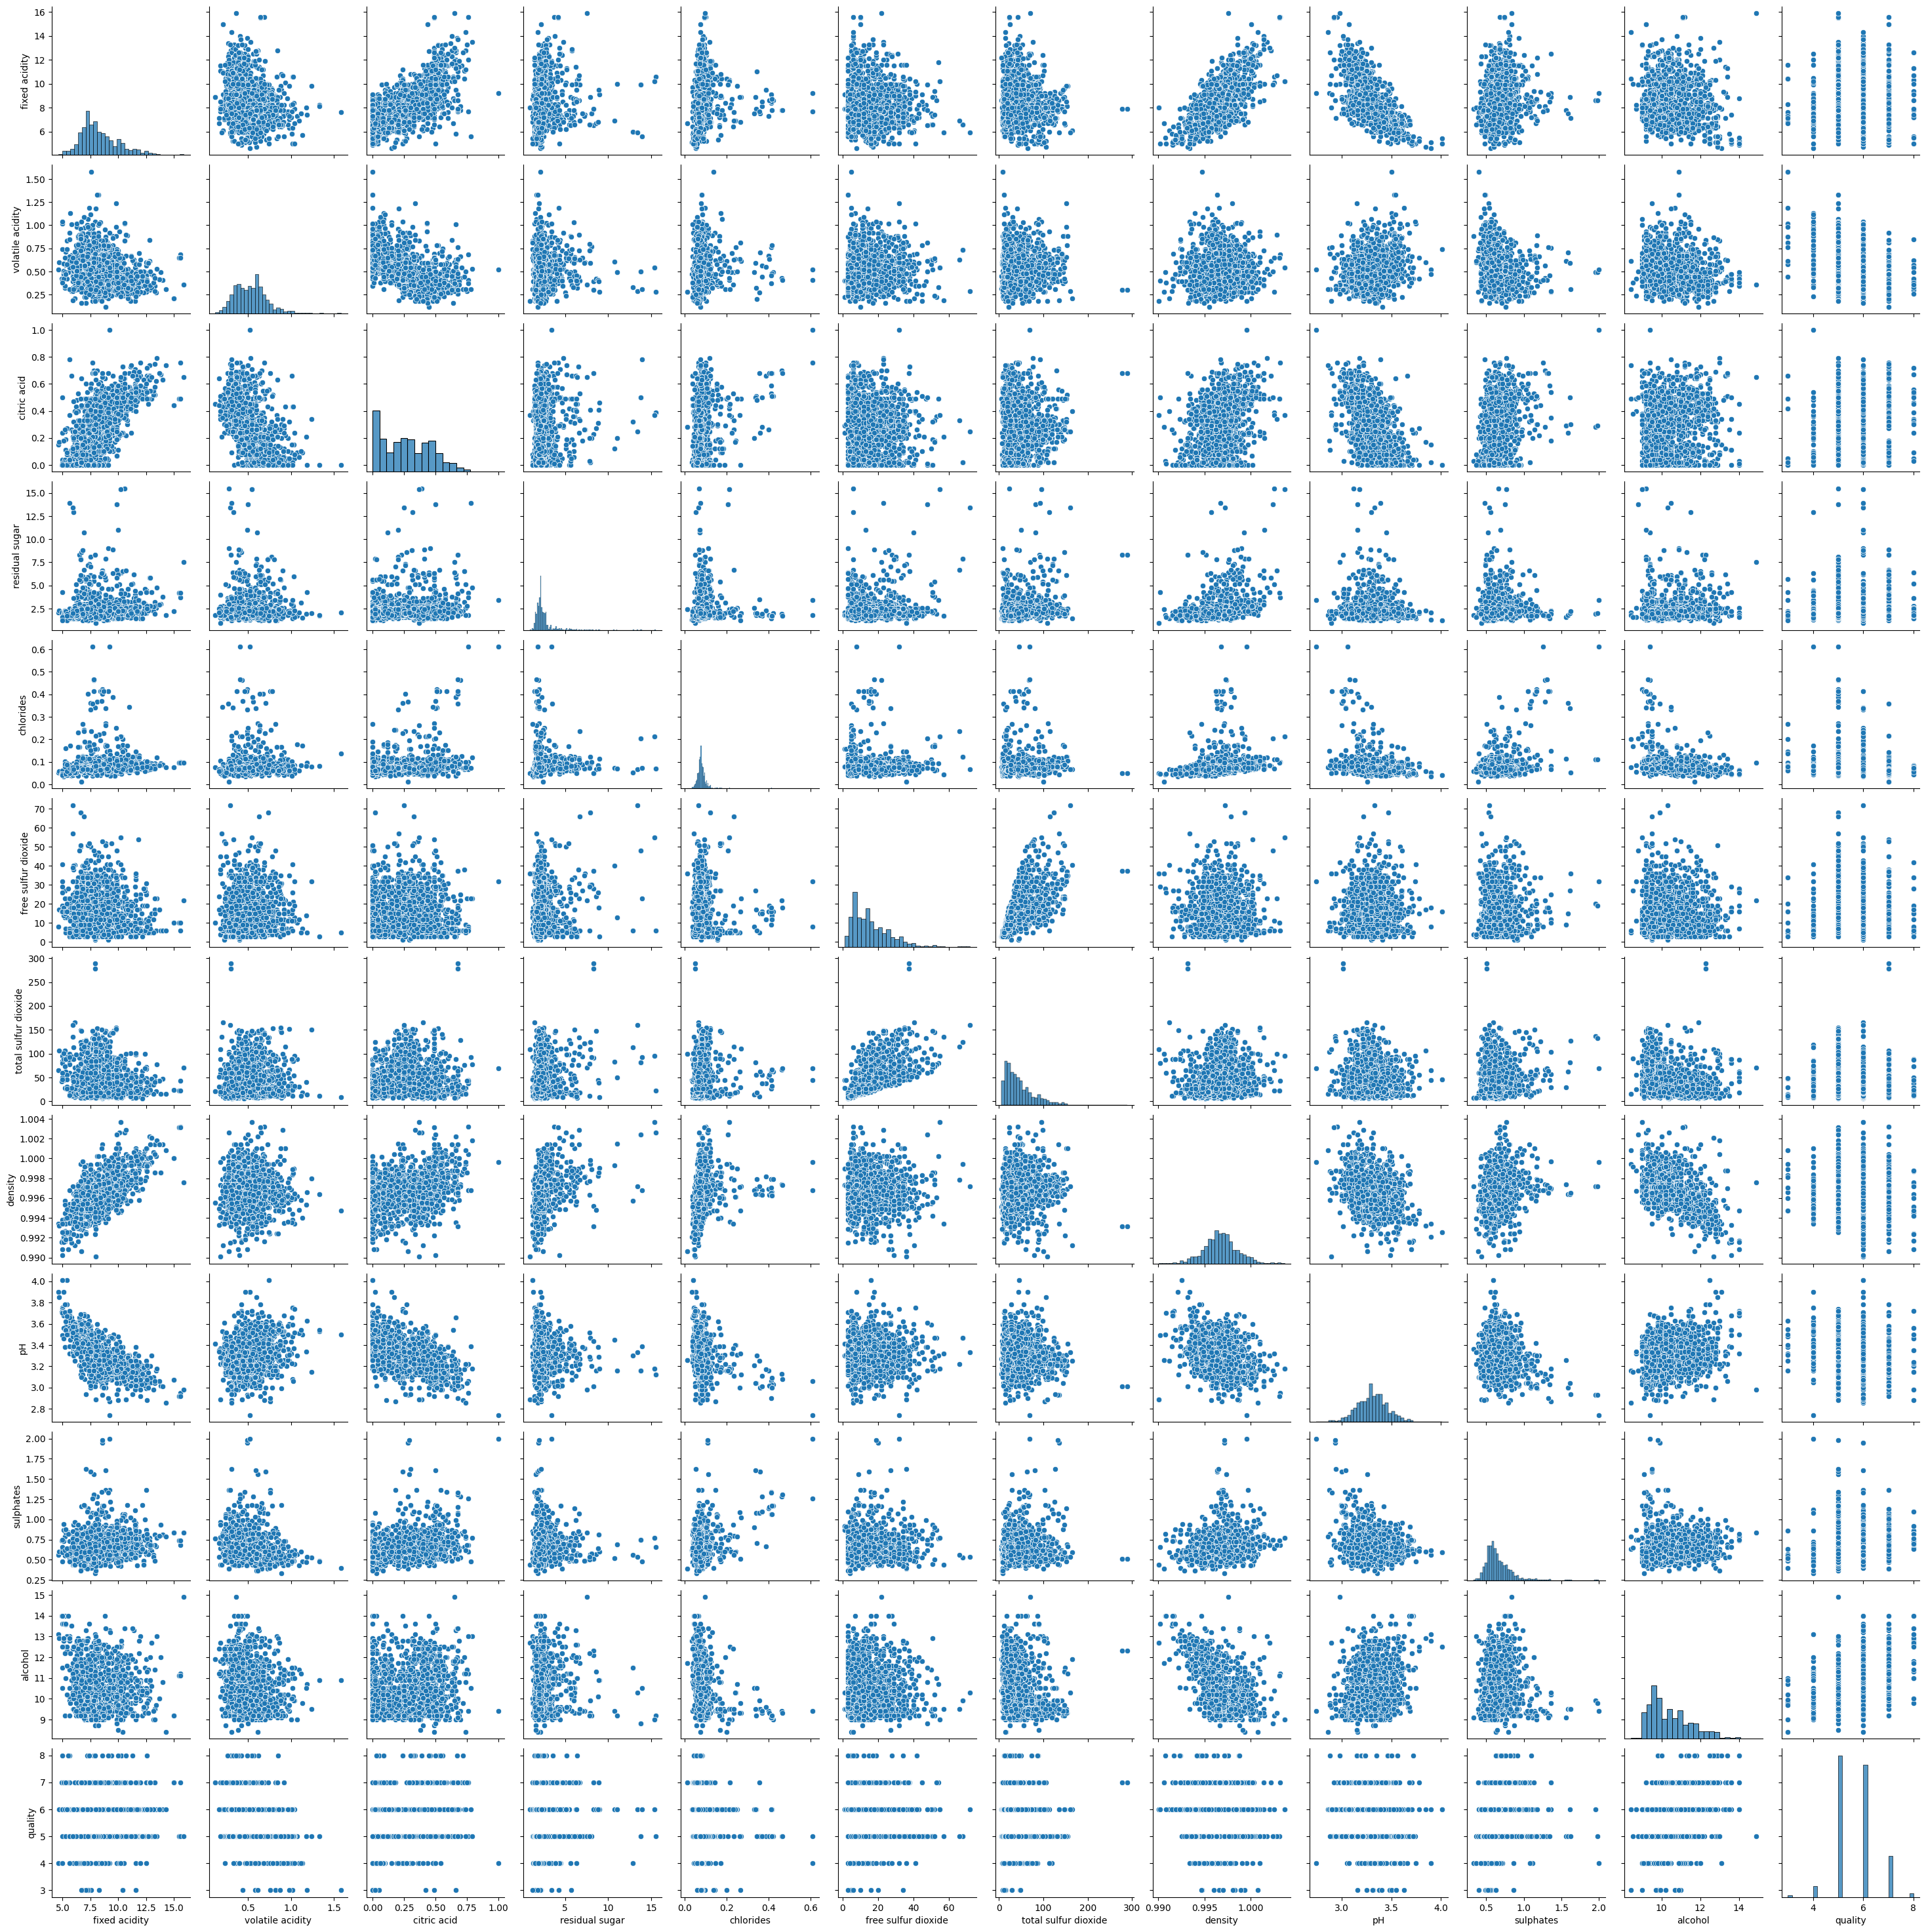

In [118]:
sns.pairplot(df)

In [119]:
#So above is the pair plot of every column which shows as realtion of all column with each other at once.

In [120]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

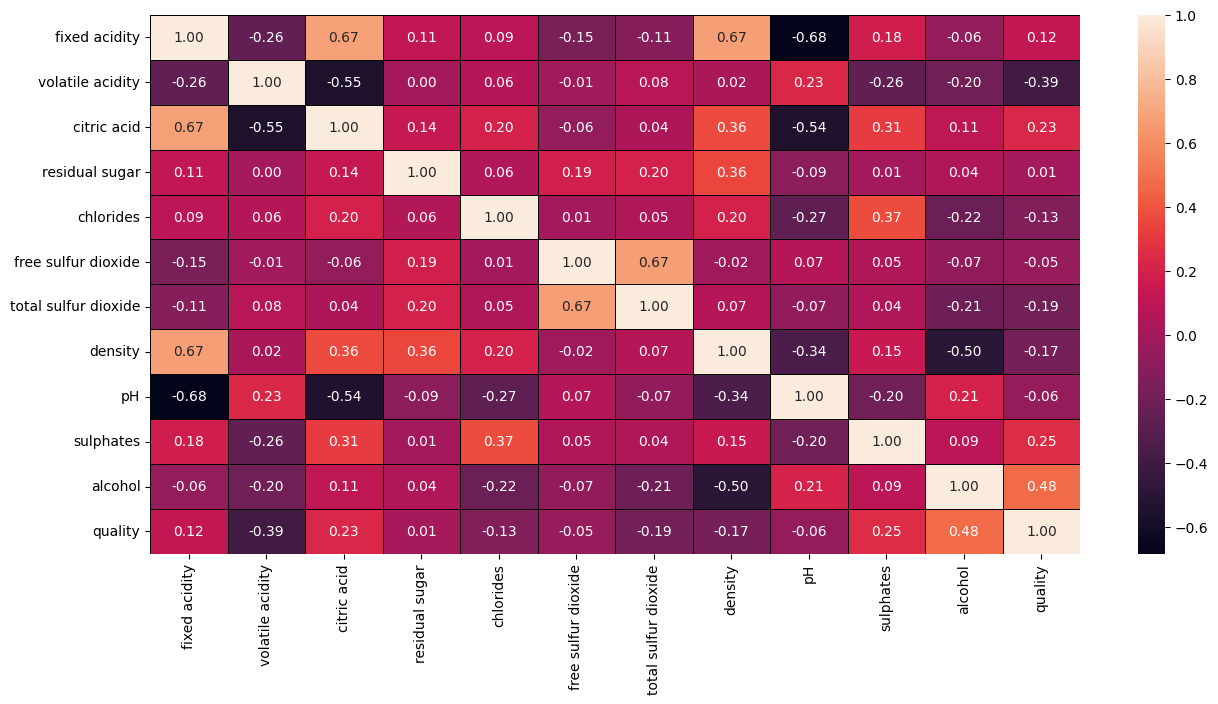

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

In [122]:
# we can see in above hitmap volatile acidity has highest negative correaltion but that is acceptbale (-0.39). and alcohol has good positve correlation whihc is our important factor.

In [123]:
# Lets check correlation of all variable with output

df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [124]:
# There is no any highly negative correlation and highly postive correlation so twe are good to go with these data.

# Outliers

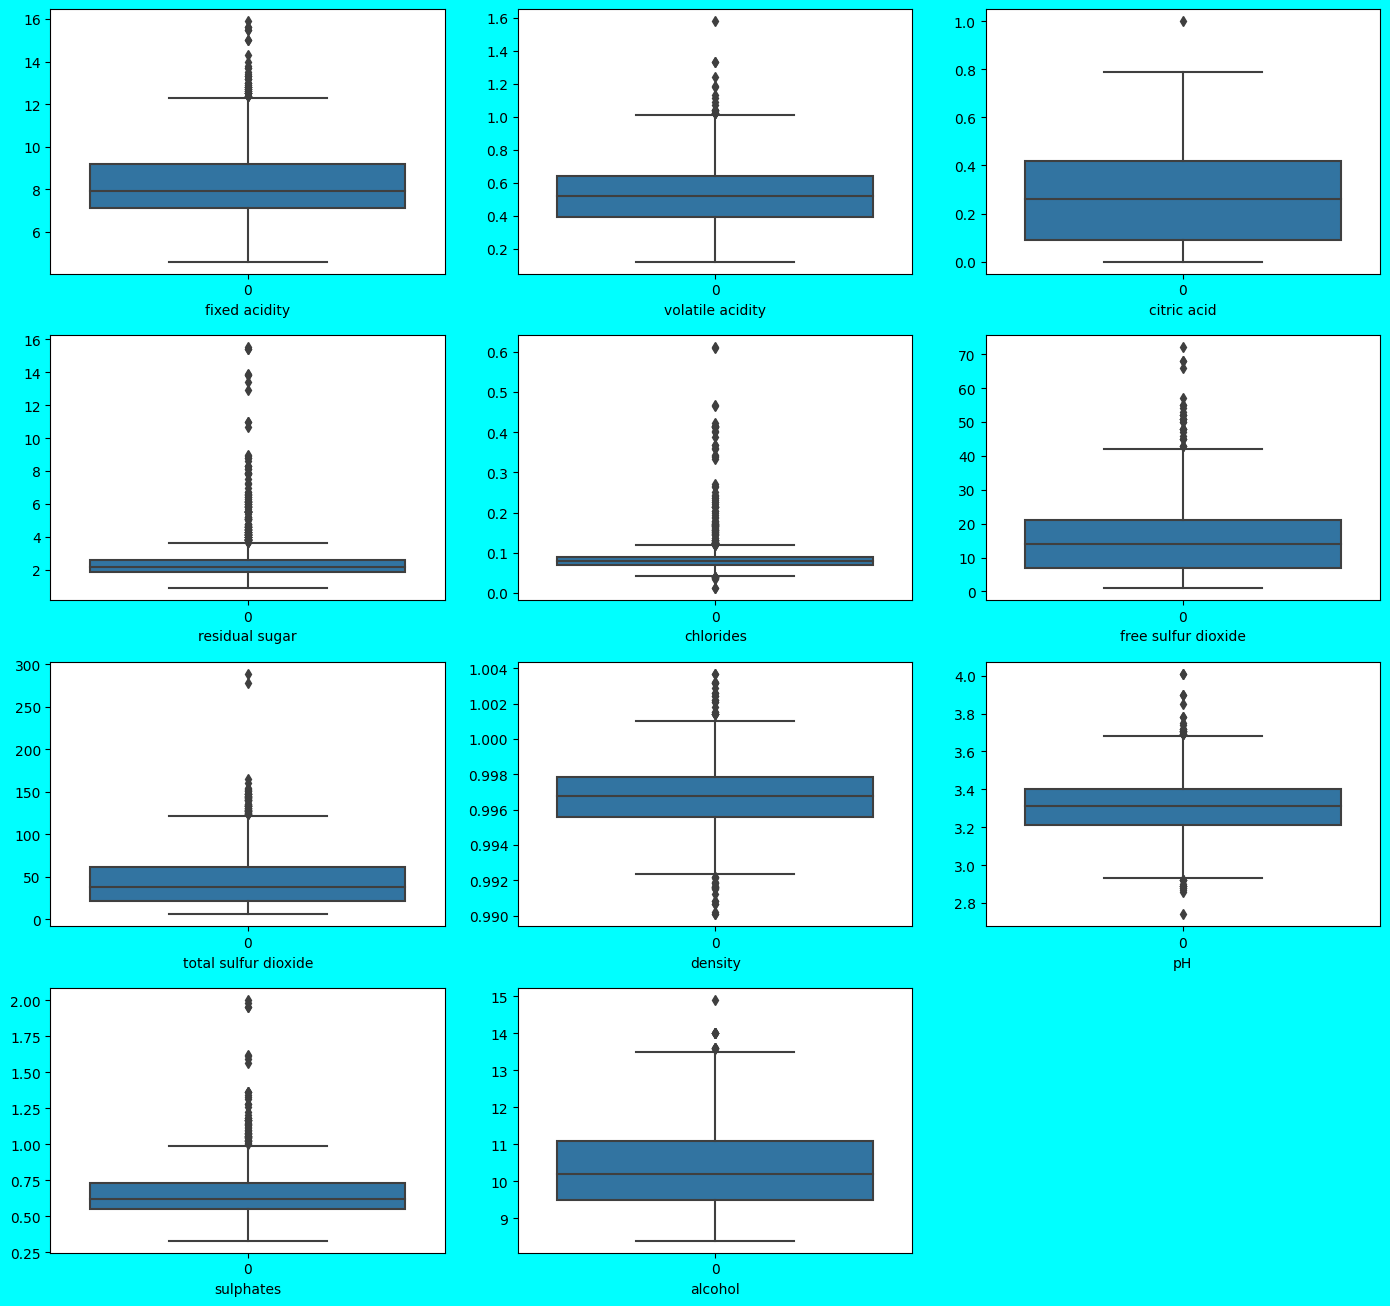

In [125]:
#Plot Box plot and check for outliers in df
plt.figure(figsize=(14,16),facecolor='cyan')
graph=1

for i in df:
    if graph<=11:
        plt.subplot(5,3,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1
    
plt.tight_layout()      

In [126]:
# We can see that almost in every column outliers are present which we need to remove

In [127]:
# we will remove outliers using Zscore



In [128]:
from scipy.stats import zscore

z=np.abs(zscore(df))

z.shape

(1599, 12)

In [129]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [130]:
len(np.where(z>3)[0])

192

In [131]:
df_new=df[(z<3).all(axis=1)]

print('old df', df.shape)
print('new df', df_new.shape)

old df (1599, 12)
new df (1451, 12)


In [132]:
loss_percentage=(1599-1451)/1599*100
print(loss_percentage)

9.255784865540964


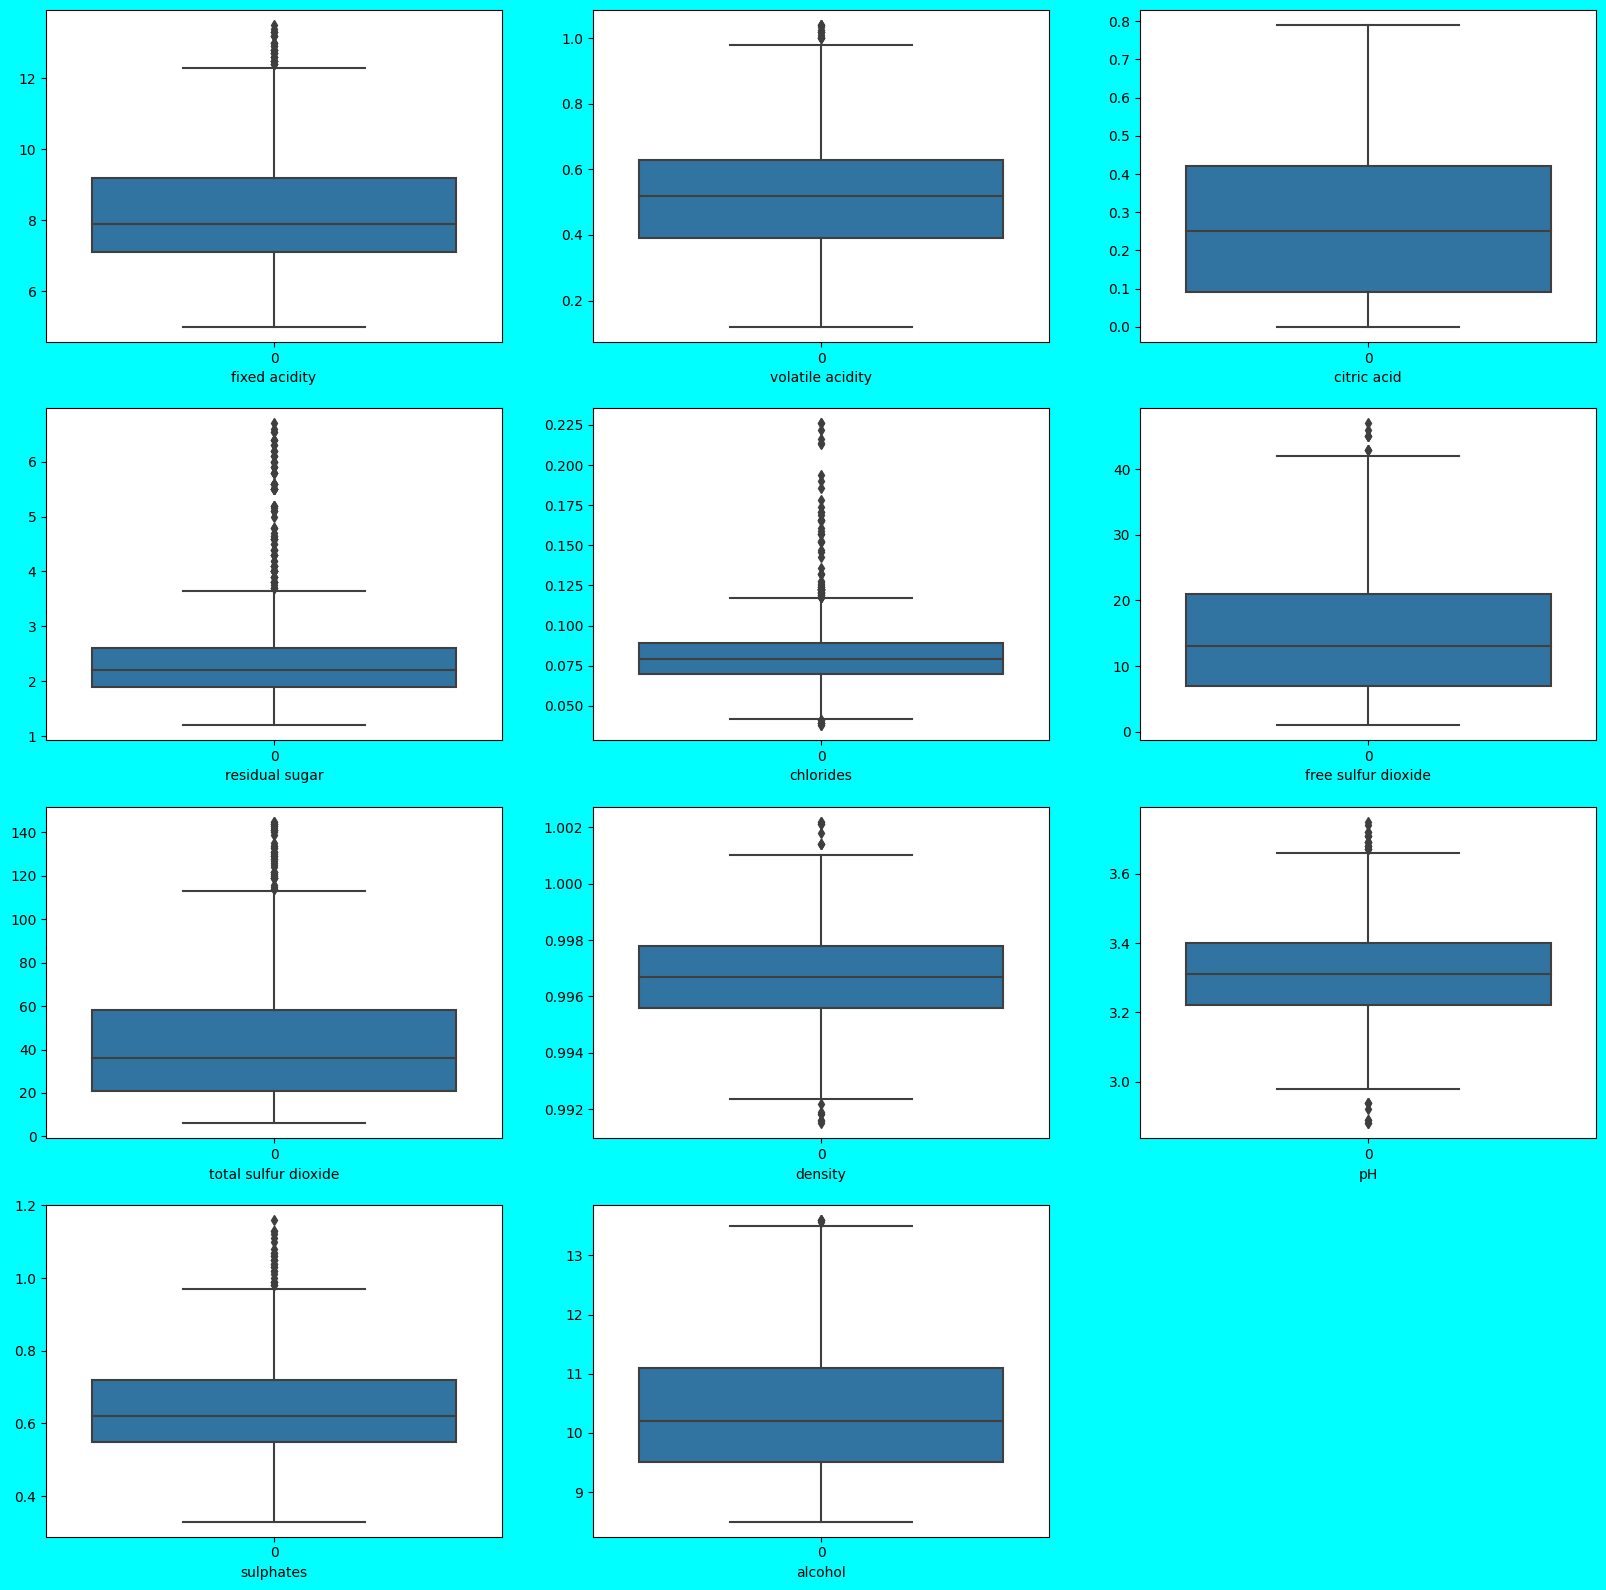

In [133]:
plt.figure(figsize=(20,25),facecolor='cyan')
graph=1

for i in df_new:
    if graph<=11:
        plt.subplot(5,3,graph)
        sns.boxplot(data=df_new[i])
        plt.xlabel(i)
    graph+=1
    
plt.show()  

In [134]:
# So we can see we have removed outliers up to some boundries

In [135]:
df_new.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1451.000000       1451.000000  1451.000000     1451.000000   
mean        8.310062          0.522950     0.265382        2.387285   
std         1.646458          0.168531     0.190934        0.862078   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1451.000000          1451.000000           1451.000000  1451.000000   
mean      0.081425            15.104755             43.735355     0.996710   
std       0.020966             9.309768             29.441284     0.001716   
min       0.038000             1.000000              6.000000     0.991500   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             36.000000     0.996700   
75%       0.089000            21.000000             58.000000     0.997800   
max       0.226000            47.000000            145.000000     1.002200   

                pH    sulphates      alcohol      quality  
count  1451.000000  1451.000000  1451.000000  1451.000000  
mean      3.315934     0.642584    10.421089     5.659545  
std       0.141096     0.129801     1.021588     0.781605  
min       2.880000     0.330000     8.500000     4.000000  
25%       3.220000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.720000    11.100000     6.000000  
max       3.750000     1.160000    13.600000     8.000000

In [136]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [137]:
# we have skewness available in data sent 
# before removinf skewness lets lets define good and bad quality of wine by making group.

df_new['quality']=df_new['quality'].map({3:'bad',4:'bad',5:'bad',6:'good',7:'good',8:'good'})

In [138]:
df_new['quality'].value_counts()

quality
good    787
bad     664
Name: count, dtype: int64

In [139]:
# Need to convert good and bad into numeric value using labelEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_new['quality']=le.fit_transform(df_new['quality'])

df_new['quality'].value_counts()



quality
1    787
0    664
Name: count, dtype: int64

In [140]:
df_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1451 rows x 12 columns]

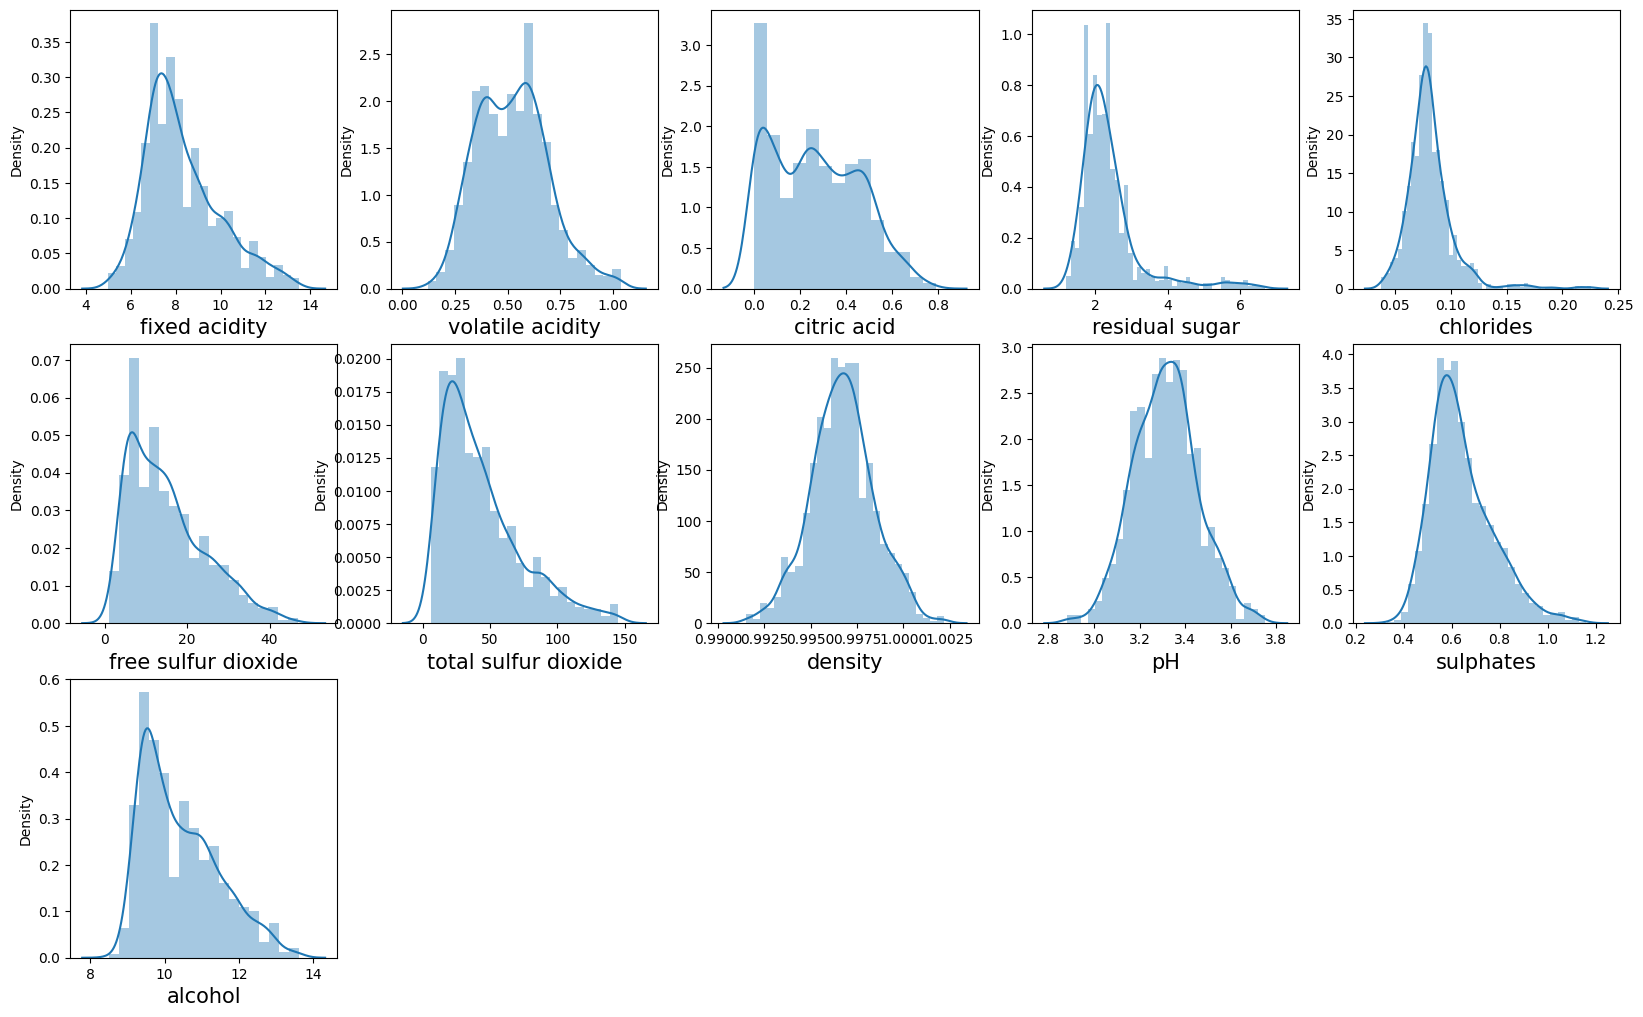

In [141]:
# Below is distplot before transformation

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in df_new:
    if plotn<=11:
        plt.subplot(5,5,plotn)
        sns.distplot(df_new[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show()    
      

In [142]:
# so above we can see residual sugar,total sulfar dioxide,free sulfur dioxide,alcohol is having high skewness. and  PH and density looks good

In [143]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [144]:
# New we ditributed X and Y data

In [145]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

In [146]:
x.shape

(1451, 11)

In [147]:
y.shape

(1451,)

In [148]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [149]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

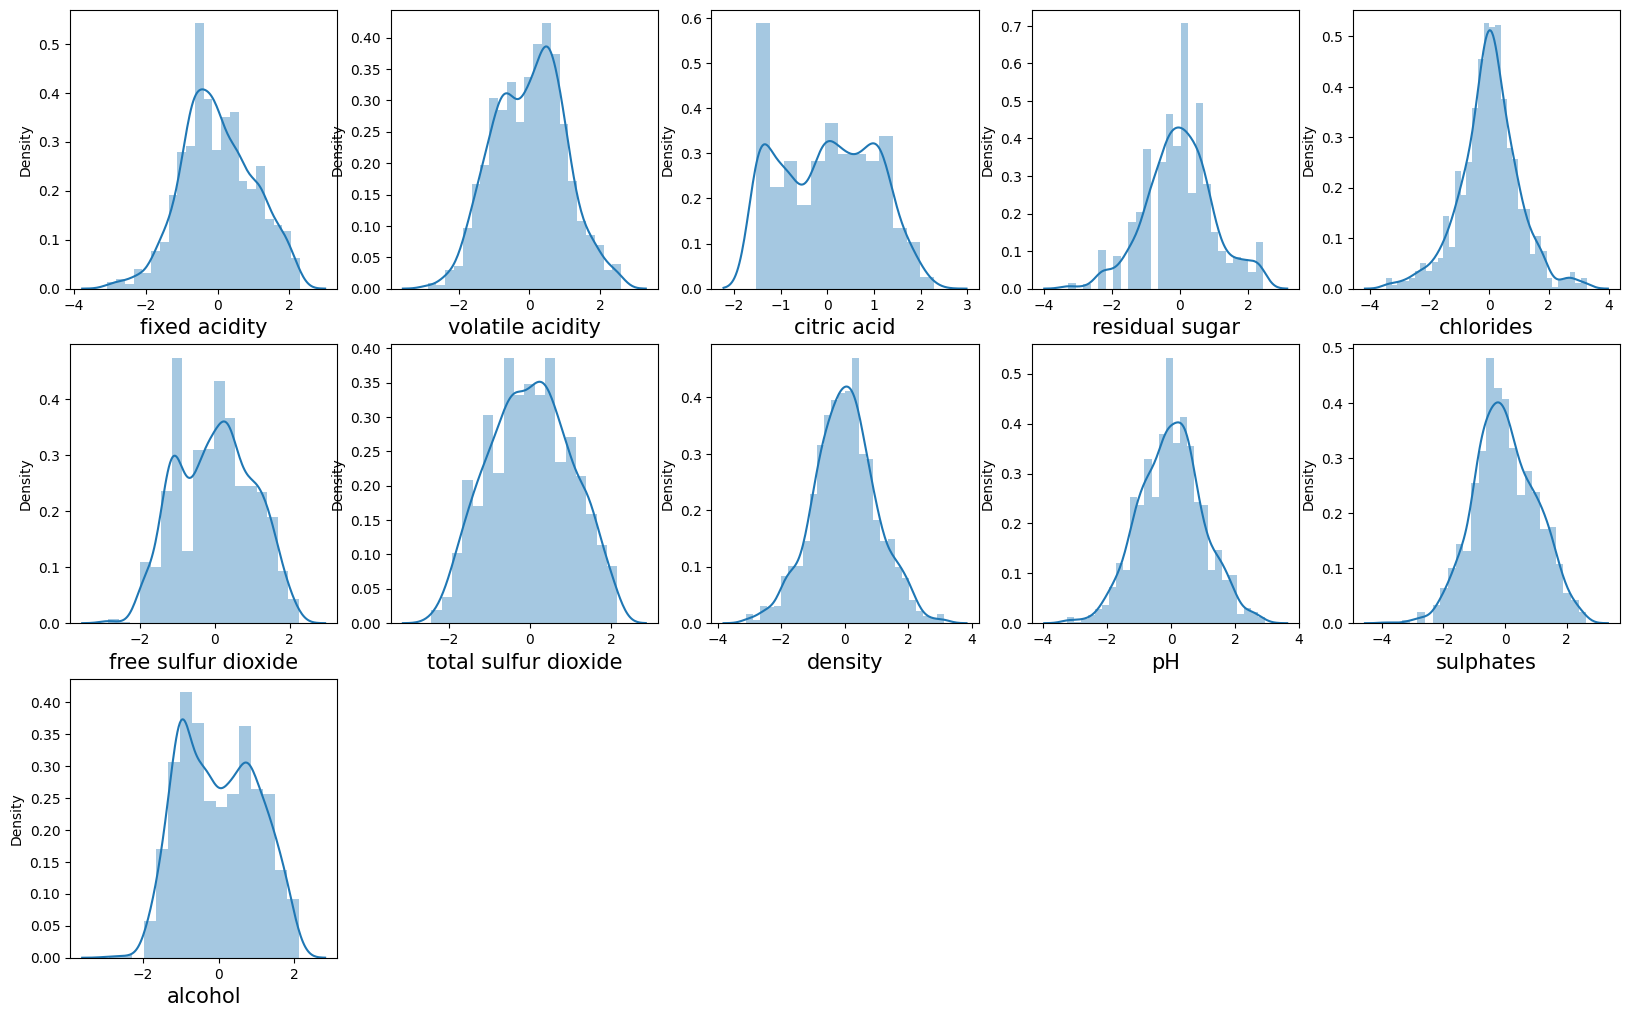

In [150]:
coulname=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

new_x=pd.DataFrame(data=x,columns=coulname)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=11:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show()    

      

In [151]:
# So above we can see we removed skewness for all columns.

In [152]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [153]:
# now our data is ready and clean for further process

# we will find out now best random variable

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
maxAcc = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 1.0 on Random State: 110


In [155]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [156]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()


model=[LOGR,RFC,DTC,SV,KNN]


for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=110)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[153  55]
 [ 41 187]]
Classification report :               precision    recall  f1-score   support

           0       0.79      0.74      0.76       208
           1       0.77      0.82      0.80       228

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436

Accuracy score : 0.7798165137614679
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[163  45]
 [ 36 192]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.78      0.80       208
           1       0.81      0.84      0.83       228

    accuracy                           0.81       436
   macro avg       0.81      0.81      0.81       436
weighted avg       0.81      0.81      0.81       4

# Cross Validation 

In [157]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.65292096 0.67931034 0.7862069  0.7137931  0.72413793]
0.7112738476122764
0.045196278302328696


Cross_Validation_score of RandomForestClassifier() is
[0.65979381 0.71034483 0.77241379 0.70344828 0.70344828]
0.7098897973693565
0.03606120075669535


Cross_Validation_score of DecisionTreeClassifier() is
[0.61512027 0.65517241 0.71034483 0.66206897 0.64137931]
0.6568171584310937
0.031216839290161395


Cross_Validation_score of SVC() is
[0.69415808 0.69310345 0.81724138 0.72068966 0.71724138]
0.728486787534068
0.04581500453034141


Cross_Validation_score of KNeighborsClassifier() is
[0.65979381 0.66551724 0.75172414 0.64827586 0.64482759]
0.6740277284038394
0.03956658103448598




# ROC AUC Scores

In [158]:
model=[LOGR,RFC,DTC,SV,KNN]

from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN]

for n in j:
  print('Score of ',n,'is')
  predn=n.predict(x_test)
  print(roc_auc_score(y_test,predn))
  print("*************************************")

Score of  LogisticRegression(solver='liblinear') is
0.7778761808367072
*************************************
Score of  RandomForestClassifier() is
0.8128795546558705
*************************************
Score of  DecisionTreeClassifier() is
0.7638748313090418
*************************************
Score of  SVC() is
0.7726467611336033
*************************************
Score of  KNeighborsClassifier() is
0.7438006072874493
*************************************


In [159]:
# SO from above we can see Random foreast is working very well

# Lets try to increase accuracy by Hyper tunning

# Hyper Parameter Tuning

#RandomForestClassifier

In [160]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
Gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [161]:
Gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [163]:
Best_model=RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth=60 , max_features = 'sqrt',min_samples_leaf = 5, min_samples_split = 5)
Best_model.fit(x_train,y_train)
predrf=Best_model.predict(x_test)
acc=accuracy_score(y_test,predrf)
print(acc*100)

82.33944954128441


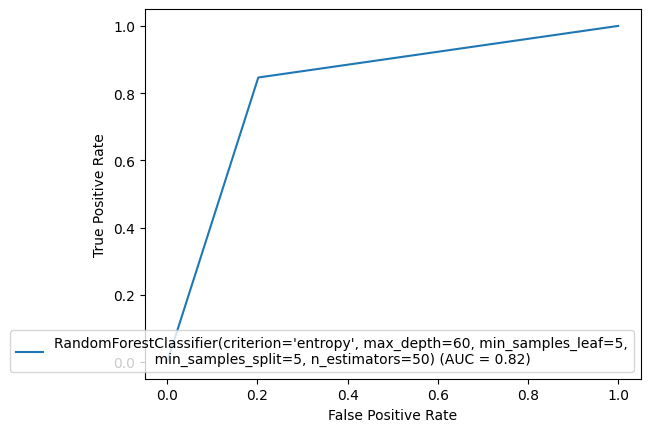

In [164]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,predrf)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Best_model)
display.plot()

In [165]:
cm=confusion_matrix(y_test,Best_model.predict(x_test))
cm

array([[166,  42],
       [ 35, 193]], dtype=int64)

In [166]:
# Now after putting manual tuning I got accuarcy around 82.33 percentage. So I will save this model
# After all ROC and AUC score,curve we found that Random forest is working very well as compared to other

In [167]:
import joblib
joblib.dump(Best_model,"Best_Wine_Model.obj")

['Best_Wine_Model.obj']

In [168]:
model = joblib.load("Best_Wine_Model.obj")
print(model.predict(x_test))

[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1]


In [169]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

orginal  predicted
0          1          1
1          1          1
2          0          0
3          1          1
4          1          1
..       ...        ...
431        0          0
432        0          1
433        1          1
434        0          1
435        1          1

[436 rows x 2 columns]

### So predicated and original value match up to 82 percent.